## Here is a Students Performance Dataset
##### We will Visualize this dataset and get insight information and Train the dataset for Prediction

###### **Importing necessary Libraries**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

###### **Now,loading the Dataset** (csv file)

In [2]:
df=pd.read_csv(r"StudentPerformanceFactors.csv")

###### **Checking the Shape of the dataset**

In [3]:
df.shape

(6607, 20)

###### **Using Head() function for showing 1st five Rows**

In [4]:
df.head()

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70


###### **Checking is there any missing value or not**

In [5]:
df.isnull().sum()

Hours_Studied                  0
Attendance                     0
Parental_Involvement           0
Access_to_Resources            0
Extracurricular_Activities     0
Sleep_Hours                    0
Previous_Scores                0
Motivation_Level               0
Internet_Access                0
Tutoring_Sessions              0
Family_Income                  0
Teacher_Quality               78
School_Type                    0
Peer_Influence                 0
Physical_Activity              0
Learning_Disabilities          0
Parental_Education_Level      90
Distance_from_Home            67
Gender                         0
Exam_Score                     0
dtype: int64

###### **Filling the missing values**

In [6]:
Teacher_Quality=["High","Medium","Low"]
df["Teacher_Quality"] = df["Teacher_Quality"].apply(lambda x: np.random.choice(Teacher_Quality) if pd.isna(x) else x)

In [7]:
Education=["High School","College","Postgraduate"]
df["Parental_Education_Level"]= df["Parental_Education_Level"].apply(lambda x: np.random.choice(Education)if pd.isna(x) else x)	


In [8]:
Distance=["Near","Moderate","Far"]
df["Distance_from_Home"]= df["Distance_from_Home"].apply(lambda x: np.random.choice(Distance)if pd.isna(x) else x)	


######  **Checking Information of Dataset**

In [9]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6607 entries, 0 to 6606
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Hours_Studied               6607 non-null   int64 
 1   Attendance                  6607 non-null   int64 
 2   Parental_Involvement        6607 non-null   object
 3   Access_to_Resources         6607 non-null   object
 4   Extracurricular_Activities  6607 non-null   object
 5   Sleep_Hours                 6607 non-null   int64 
 6   Previous_Scores             6607 non-null   int64 
 7   Motivation_Level            6607 non-null   object
 8   Internet_Access             6607 non-null   object
 9   Tutoring_Sessions           6607 non-null   int64 
 10  Family_Income               6607 non-null   object
 11  Teacher_Quality             6607 non-null   object
 12  School_Type                 6607 non-null   object
 13  Peer_Influence              6607 non-null   obje

###### **Checking outliers**

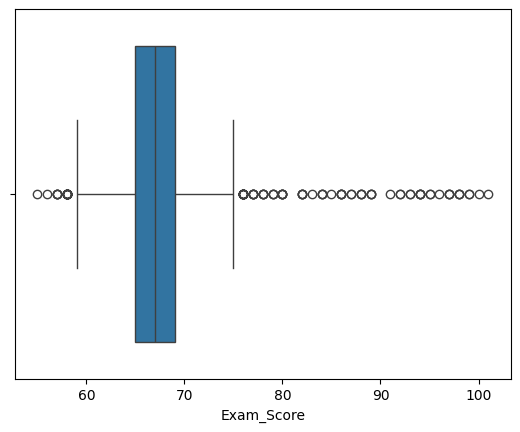

In [11]:
sns.boxplot(x=df['Exam_Score'])
plt.show()

###### **Removing outliers**

In [10]:
Q1 = df['Exam_Score'].quantile(0.25)
Q3 = df['Exam_Score'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df = df[(df['Exam_Score'] >= lower_bound) & (df['Exam_Score'] <= upper_bound)]


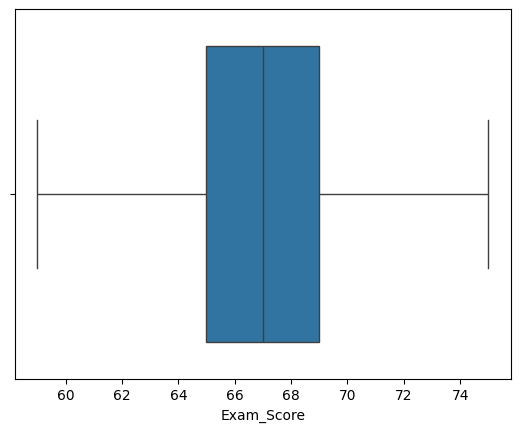

In [14]:
sns.boxplot(x=df['Exam_Score'])
plt.show()


###### **Correlation Heatmap of Numerical Features in the Dataset**

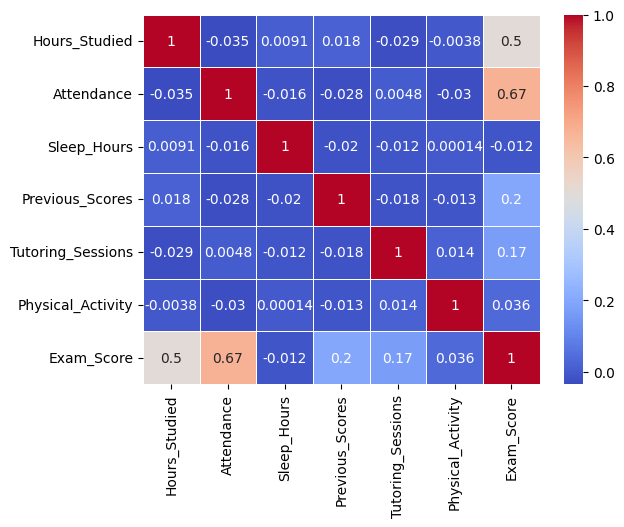

In [11]:
numeric_cols = df.select_dtypes(include='number')
sns.heatmap(numeric_cols.corr(), annot=True, cmap='coolwarm',linewidths=0.5)
plt.show()

###### **Line Plot: Hours Studied vs Exam Score**

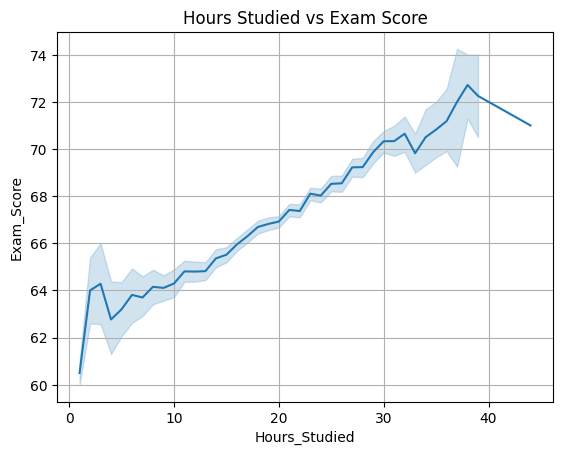

In [16]:
sns.lineplot(x='Hours_Studied', y='Exam_Score', data=df)
plt.title("Hours Studied vs Exam Score")
plt.grid(True)
plt.show()


###### **Pairplot of Key Numerical Features**

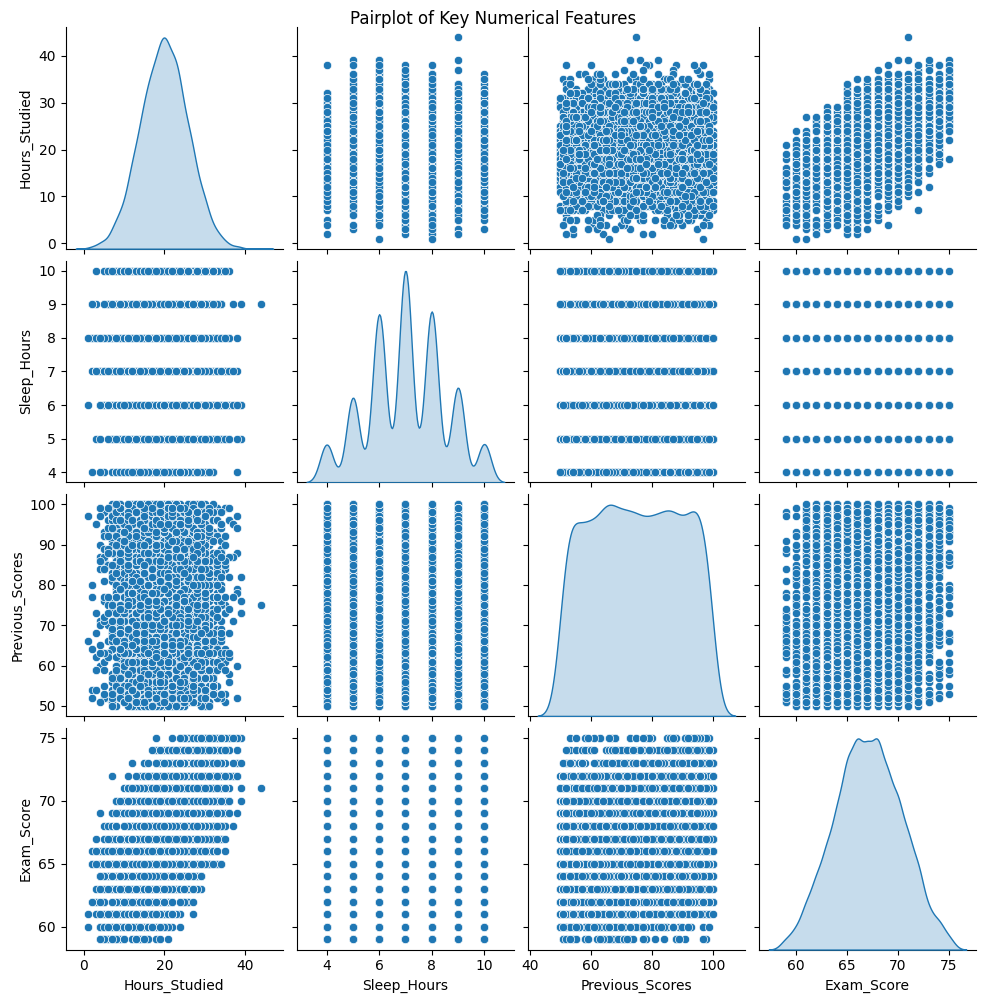

In [17]:
sns.pairplot(df[['Hours_Studied', 'Sleep_Hours', 'Previous_Scores', 'Exam_Score']], diag_kind='kde')  
plt.suptitle("Pairplot of Key Numerical Features", y=1)
plt.show()


###### **Importing Linear Regression Model and Feature Scaler**

In [12]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler

###### *Checking numerical columns*

In [13]:
numeric_cols.columns

Index(['Hours_Studied', 'Attendance', 'Sleep_Hours', 'Previous_Scores',
       'Tutoring_Sessions', 'Physical_Activity', 'Exam_Score'],
      dtype='object')

###### **Checking columns of Original dataset** 

In [14]:
df.columns

Index(['Hours_Studied', 'Attendance', 'Parental_Involvement',
       'Access_to_Resources', 'Extracurricular_Activities', 'Sleep_Hours',
       'Previous_Scores', 'Motivation_Level', 'Internet_Access',
       'Tutoring_Sessions', 'Family_Income', 'Teacher_Quality', 'School_Type',
       'Peer_Influence', 'Physical_Activity', 'Learning_Disabilities',
       'Parental_Education_Level', 'Distance_from_Home', 'Gender',
       'Exam_Score'],
      dtype='object')

###### **Selecting Important Categorical Columns from the Dataset**

In [15]:
string_cols=['Parental_Involvement','Teacher_Quality','Gender']

###### **Creating a Subset DataFrame with Selected Categorical Columns**

In [16]:
string_data=df[string_cols]
string_data

,Parental_Involvement,Teacher_Quality,Gender
0,Low,Medium,Male
1,Low,Medium,Female
2,Medium,Medium,Male
3,Low,Medium,Male
4,Medium,High,Female
...,...,...,...
6602,High,Medium,Female
6603,High,High,Female
6604,Medium,Medium,Female
6605,High,Medium,Female


###### **One-Hot Encoding of Categorical Features**

In [17]:
string_dummies=pd.get_dummies(string_data,drop_first=True)
string_dummies

,Parental_Involvement_Low,Parental_Involvement_Medium,Teacher_Quality_Low,Teacher_Quality_Medium,Gender_Male
0,1,0,0,1,1
1,1,0,0,1,0
2,0,1,0,1,1
3,1,0,0,1,1
4,0,1,0,0,0
...,...,...,...,...,...
6602,0,0,0,1,0
6603,0,0,0,0,0
6604,0,1,0,1,0
6605,0,0,0,1,0


###### **Combining Numerical and Encoded Categorical Features into One Dataset**

In [18]:
combine=pd.concat([numeric_cols,string_dummies],axis=1)#.reset_index(inplace=True)
combine.columns

Index(['Hours_Studied', 'Attendance', 'Sleep_Hours', 'Previous_Scores',
       'Tutoring_Sessions', 'Physical_Activity', 'Exam_Score',
       'Parental_Involvement_Low', 'Parental_Involvement_Medium',
       'Teacher_Quality_Low', 'Teacher_Quality_Medium', 'Gender_Male'],
      dtype='object')

###### **Initializing Min-Max Scaler for Feature Scaling**

In [19]:
min_max= MinMaxScaler()

###### **Normalizing Features to Range [0, 1] Using MinMaxScaler**

In [20]:
scaled=min_max.fit_transform(combine)

###### **Converting Scaled Data to DataFrame and Assigning Column Names**

In [21]:
scaled_data=pd.DataFrame(scaled)
scaled_data.columns=['Hours_Studied', 'Attendance', 'Sleep_Hours', 'Previous_Scores',
       'Tutoring_Sessions', 'Physical_Activity', 'Exam_Score',
       'Parental_Involvement_Low', 'Parental_Involvement_Medium',
       'Teacher_Quality_Low', 'Teacher_Quality_Medium', 'Gender_Male']

In [22]:
scaled_data

,Hours_Studied,Attendance,Sleep_Hours,Previous_Scores,Tutoring_Sessions,Physical_Activity,Exam_Score,Parental_Involvement_Low,Parental_Involvement_Medium,Teacher_Quality_Low,Teacher_Quality_Medium,Gender_Male
0,0.511628,0.600,0.500000,0.46,0.000,0.500000,0.5000,1.0,0.0,0.0,1.0,1.0
1,0.418605,0.100,0.666667,0.18,0.250,0.666667,0.1250,1.0,0.0,0.0,1.0,0.0
2,0.534884,0.950,0.500000,0.82,0.250,0.666667,0.9375,0.0,1.0,0.0,1.0,1.0
3,0.651163,0.725,0.666667,0.96,0.125,0.666667,0.7500,1.0,0.0,0.0,1.0,1.0
4,0.418605,0.800,0.333333,0.30,0.375,0.666667,0.6875,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
6498,0.558140,0.225,0.500000,0.52,0.125,0.333333,0.5625,0.0,0.0,0.0,1.0,0.0
6499,0.511628,0.400,0.666667,0.62,0.375,0.333333,0.6250,0.0,0.0,0.0,0.0,0.0
6500,0.441860,0.750,0.333333,0.30,0.375,0.333333,0.5625,0.0,1.0,0.0,1.0,0.0
6501,0.209302,0.650,0.333333,0.82,0.250,0.500000,0.5625,0.0,0.0,0.0,1.0,0.0


###### **Correlation Heatmap of Scaled Features**

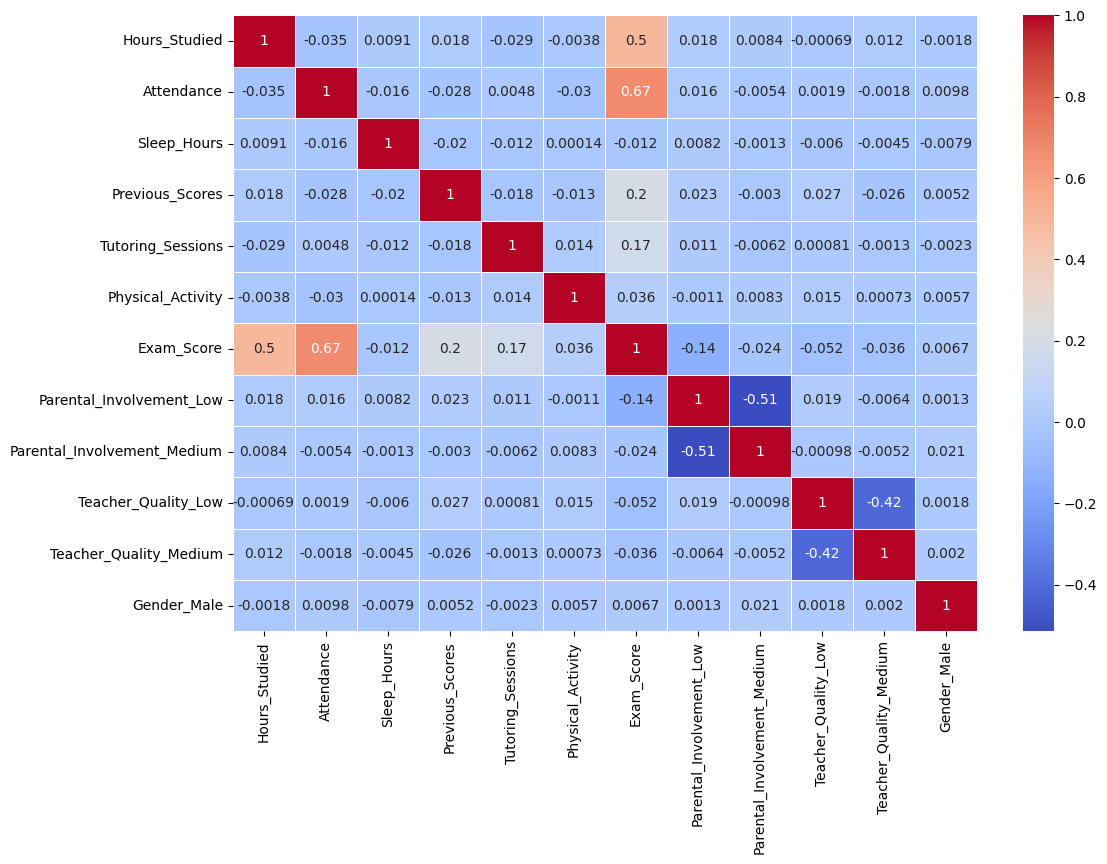

In [23]:
plt.figure(figsize=(12, 8))
sns.heatmap(scaled_data.corr(), annot=True, cmap='coolwarm',linewidths=0.5)
plt.show()

In [24]:
scaled_data.columns

Index(['Hours_Studied', 'Attendance', 'Sleep_Hours', 'Previous_Scores',
       'Tutoring_Sessions', 'Physical_Activity', 'Exam_Score',
       'Parental_Involvement_Low', 'Parental_Involvement_Medium',
       'Teacher_Quality_Low', 'Teacher_Quality_Medium', 'Gender_Male'],
      dtype='object')

###### **Selecting Independent Variables (Features) for Model Training**

In [25]:
X=scaled_data[['Hours_Studied', 'Attendance', 'Sleep_Hours', 'Previous_Scores',
       'Tutoring_Sessions', 'Physical_Activity', 'Parental_Involvement_Low', 'Parental_Involvement_Medium',
       'Teacher_Quality_Low', 'Teacher_Quality_Medium', 'Gender_Male']]

###### **Defining Target Variable (y) as Exam Score for Model Training**

In [26]:
y=scaled_data["Exam_Score"]

###### **Importing Train-Test Split for Data Splitting**

In [27]:
from sklearn.model_selection import train_test_split

###### **Splitting Data into Training and Testing Sets (80-20 Split)**

In [28]:
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=42,test_size=0.2)

###### **Preparing Linear Regression Model for Training**

In [29]:
model = LinearRegression()

###### **Training the Linear Regression Model on the Training Data**

In [30]:
model.fit(X_train,y_train)

LinearRegression()

###### **Getting Coefficients of the Linear Regression Model**

In [31]:
model.coef_

array([ 7.88940412e-01,  4.99457682e-01, -3.84637714e-04,  1.54350076e-01,
        2.43262568e-01,  7.38093698e-02, -1.20216866e-01, -6.04025650e-02,
       -5.62942591e-02, -3.14601872e-02,  1.58057099e-03])

###### **Making Predictions Using the Trained Linear Regression Model**

In [32]:
y_pred =model.predict(X_test)

###### **Importing Model Evaluation Metrics: R-squared and Mean Squared Error**

In [33]:
from sklearn.metrics import r2_score,mean_squared_error

###### **Calculating R-squared (Accuracy) for Model Evaluation**

In [34]:
accuracy=r2_score(y_pred,y_test)
accuracy*100

85.1869063054627

###### **Calculating Mean Squared Error (MSE) for Model Evaluation**

In [35]:
error=mean_squared_error(y_pred,y_test)
error

0.005403541023390732

In [36]:
import joblib

In [37]:
joblib.dump(model,"student_score.pkl")

['student_score.pkl']

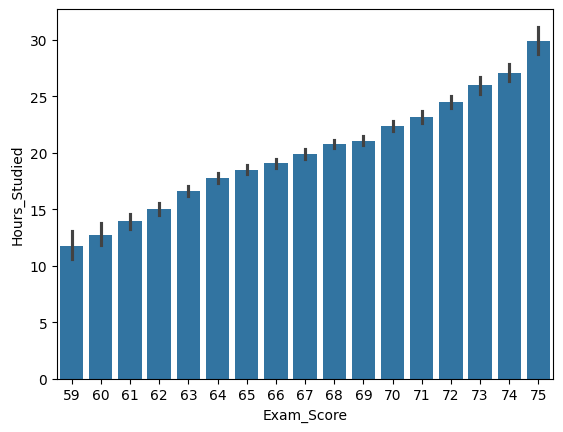

In [41]:
sns.barplot(x='Exam_Score', y='Hours_Studied', data=df)
plt.show()